In [11]:
import numpy as np
import pandas as pd

In [12]:
import matplotlib.pyplot as plt 

In [13]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

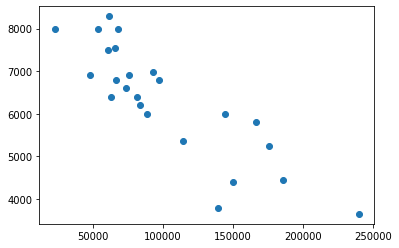

In [14]:
plt.scatter(x, y)

In [15]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(24, 1)
(24, 1)


In [16]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(24, 2)

In [17]:
X

array([[2.4000e+05, 1.0000e+00],
       [1.3980e+05, 1.0000e+00],
       [1.5050e+05, 1.0000e+00],
       [1.8553e+05, 1.0000e+00],
       [1.7600e+05, 1.0000e+00],
       [1.1480e+05, 1.0000e+00],
       [1.6680e+05, 1.0000e+00],
       [8.9000e+04, 1.0000e+00],
       [1.4450e+05, 1.0000e+00],
       [8.4000e+04, 1.0000e+00],
       [8.2029e+04, 1.0000e+00],
       [6.3060e+04, 1.0000e+00],
       [7.4000e+04, 1.0000e+00],
       [9.7500e+04, 1.0000e+00],
       [6.7000e+04, 1.0000e+00],
       [7.6025e+04, 1.0000e+00],
       [4.8235e+04, 1.0000e+00],
       [9.3000e+04, 1.0000e+00],
       [6.0949e+04, 1.0000e+00],
       [6.5674e+04, 1.0000e+00],
       [5.4000e+04, 1.0000e+00],
       [6.8500e+04, 1.0000e+00],
       [2.2899e+04, 1.0000e+00],
       [6.1789e+04, 1.0000e+00]])

In [18]:
theta = np.random.randn(2, 1)

In [19]:
theta.shape

(2, 1)

In [20]:
theta

array([[-1.22370106],
       [ 1.59079815]])

In [21]:
def model(X, theta):
    return X.dot(theta)

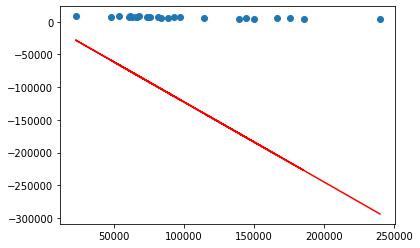

In [22]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [25]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [26]:
cost_function(X, y, theta)

10372538671.6391

In [27]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [28]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [35]:
learning_rate=200
n_iterations=24
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
theta_final

<ipython-input-25-7ee97a77a0fc>:3: RuntimeWarning: overflow encountered in square
  return 1/(2*m) * np.sum((model(X, theta) - y)**2)
/Users/imhaimou/.brew/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([[-9.13635879e+297],
       [-7.17278030e+292]])

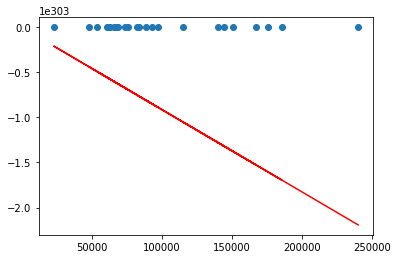

In [36]:
predictions = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

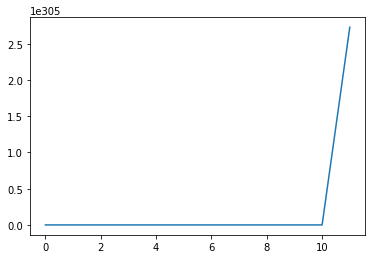

In [64]:
plt.plot(range(n_iterations), cost_history)

In [40]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [65]:
coef_determination(y, predictions)

<ipython-input-42-8e08753eb012>:2: RuntimeWarning: overflow encountered in square
  u = ((y - pred)**2).sum()


-inf